## Deep Learning Membedakan Batu , Gunting dan Kertas

### Extract Folder Zip to Dataset Folder dataset

In [38]:
import zipfile
import os
import PIL
import numpy as np
import tensorflow as tf
import shutil # Split Data Train and Validasi
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [ ]:
# link dataset : https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors
# API Command : kaggle datasets download -d drgfreeman/rockpaperscissors

In [23]:
dataset_dir = 'dataset_raw'
os.mkdir(dataset_dir) 

In [25]:
target_file = 'rock-paper-scissor.zip'

extracting = zipfile.ZipFile(target_file, 'r')

extracting.extractall(dataset_dir)

extracting.close()

### SPLITTING DATASET TRAINING AND VALIDATION

In [ ]:
# Paper

# 80 % -> Training
# paper1.png
# paper2.png
# paper3.png
# paper4.png

# 20 % -> Validation
# paper5.png

In [28]:
dataset_dir = os.path.join(dataset_dir, 'rps-cv-images')
# dataset_raw/rps-cv-images

In [30]:
classdir_list = ['paper', 'rock', 'scissors']

In [11]:
training_percentage = 0.9

In [13]:
training_dataset_dir = 'training'
validation_dataset_dir = 'validation'

In [36]:
os.mkdir(training_dataset_dir)
os.mkdir(validation_dataset_dir)

In [40]:
for dirname in classdir_list:
    classpath = os.path.join(dataset_dir, dirname)
    # dataset_raw/rps-cv-images/scissors
    
    counter = 0
    training_length = training_percentage * len(os.listdir(classpath))
    
    training_classpath = os.path.join(training_dataset_dir, dirname)
    
    # training/paper
    validation_classpath = os.path.join(validation_dataset_dir, dirname)
    
    os.mkdir(training_classpath)
    os.mkdir(validation_classpath)
    
    for filename in os.listdir(classpath):
        filepath = os.path.join(classpath, filename)
        if counter < training_length:
            shutil.move(filepath, training_classpath)
        else:
            shutil.move(filepath, validation_classpath)
        
        counter += 1

### PREPROCESSING - TRANSFORMASI DATA

In [5]:
# ImageDataGenerator
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.25,
    horizontal_flip = True,
    vertical_flip = True
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
)

In [15]:
training_generator = training_datagen.flow_from_directory(
    #os.path.join(dataset_dir, 'rps-cv-images'),
    training_dataset_dir,
    target_size = (150, 150),
    class_mode = 'categorical' 
)

validation_generator = validation_datagen.flow_from_directory(
    #os.path.join(dataset_dir, 'rps-cv-images'),
    validation_dataset_dir,
    target_size = (150, 150),
    class_mode = 'categorical' 
)

Found 1970 images belonging to 3 classes.
Found 218 images belonging to 3 classes.


In [14]:
# Join Path Manual Directory
# rock_dir = os.path.join(dataset_dir, 'rock')
# paper_dir = os.path.join(dataset_dir, 'paper')
# scissors_dir = os.path.join(dataset_dir, 'scissors')

In [22]:
# Lihat File didalam Folder rock
#os.listdir(rock_dir)

['00nKV8oHuTGi20gq.png',
 '01dM3ewPIsnBICu1.png',
 '02vG75hQW9Vp4oTl.png',
 '0bioBZYFCXqJIulm.png',
 '0NDYNEoDui7o64gU.png',
 '0OEXfEooCXlljaEl.png',
 '0P6uxM8Vr1DwySHe.png',
 '19H63c0MWD56EWNq.png',
 '1BqjHe5igJAgUjiN.png',
 '1COBZEE1ALiJIivQ.png',
 '1DxbXT3M2qiMjCmC.png',
 '1e1VCnCEApnFh9Oo.png',
 '1mnAKQCHEDbtjPX2.png',
 '1MOm36DHK0R8OfIC.png',
 '1UucZqS3qblvU0cH.png',
 '1UXuUYJ4rVj2eSvt.png',
 '1VoYiUgPE6h45MLu.png',
 '1vvcitV1s17gKdbn.png',
 '1wk2Hl1Ih9guOwx6.png',
 '1WuMUpzupKs67q29.png',
 '2affjOmZChc9AXpR.png',
 '2DdERUV7Te8ivywq.png',
 '2EAkMCm7ZLnNoBQ7.png',
 '2f25VA1nfxiC86xj.png',
 '2HSPQEteONUjEXAF.png',
 '2j9iOcnxJzcyaFB5.png',
 '2JRYQXb5kmlhgD5i.png',
 '2MKZD0VUw7Tez2Jx.png',
 '2NmrcDGkc7FQuu12.png',
 '2nSUlcvPf1DOCo1j.png',
 '2O9XPBJRT119drWX.png',
 '2Pt5UNQkMzXLtbEp.png',
 '2UaJz6Z3xJv3WX9h.png',
 '2uVMdMj10yjpR6Py.png',
 '2uxDLQKemRqulhIx.png',
 '2vwLOZSd8FCXbuck.png',
 '32PDtFdAkUiAJbmP.png',
 '337ARHTZmhCSkoEM.png',
 '3aRXheNUQ6cxechp.png',
 '3k7WrSAInCaatFtl.png',


In [26]:
# Lihat Jumlah File didalam Folder Manual directory
# print(len(os.listdir(rock_dir)))
# print(len(os.listdir(paper_dir)))
# print(len(os.listdir(scissors_dir)))

726
712
750


In [84]:
# Create Fungsi Manual ImgaeDataGenerator edit Gambar to Array 2D
 # filename = 'dataset/rock/gambarbatu1.png'
# def imgToArray(filename):
#     image = Image.open(filename)
#     image_grayscale = ImageOps.grayscale(image)
#     image_grayscale = image_grayscale.resize(size = (150, 150))
#     image_array = np.array(image_grayscale)
#     image_array = image_array/255 # ubah range 255 menjadi 0 - 1 (normalisasi)
    
#     # File jadi Flat
#     list_full = []
    
#     for single_list in image_array:
#         list_full.extend(single_list)
    
#     return np.array(list_full)

In [90]:
# Get Directory Rock Dir File - RGB
# print(imgToArray(os.path.join(rock_dir, '00nKV8oHuTGi20gq.png')))

[0.34901961 0.3372549  0.34509804 ... 0.34509804 0.3372549  0.3372549 ]


In [88]:
# MANUAL DATA LABEL
# data = []
# label = []

# #Directory Rock
# for filename in os.listdir(rock_dir):
#     image_Path = os.path.join(rock_dir, filename) # dataset/rock/00nKV8oHuTGi20gq.png
#     image_array = imgToArray(image_Path)
#     data.append(image_array)
#     label.append([1, 0, 0])
    
# #Directory Paper
# for filename in os.listdir(paper_dir):
#     image_Path = os.path.join(paper_dir, filename) # dataset/paper/00nKV8oHuTGi20gq.png
#     image_array = imgToArray(image_Path)
#     data.append(image_array)
#     label.append([0, 0, 1])
    
# #Directory Scissors
# for filename in os.listdir(scissors_dir):
#     image_Path = os.path.join(scissors_dir, filename) # dataset/scissor/00nKV8oHuTGi20gq.png
#     image_array = imgToArray(image_Path)
#     data.append(image_array)
#     label.append([0, 1, 0])  

# data = np.array(data)
# label = np.array(label)

In [92]:
# print(data.shape)
# print(label.shape)

(2188, 22500)
(2188, 3)


## CREATE MODEL DEEP LEARNING WITH TENSORFLOW

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), input_shape = (150, 150, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Ubah Layer dari 2D menjadi 1D 
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64, activation='relu'),  # hidden layers = 64
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile model - Accuracy
model.compile(
    metrics = ['acc'],
    loss = 'categorical_crossentropy',
    #optimizer = 'sgd'
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    #optimizer = 'Adam'
)

# Training Model
hasil_model = model.fit(
    #data,
    #label,
    training_generator,
    validation_data = validation_generator,
    epochs = 75,
    verbose=1
)

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/75
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 369ms/step - acc: 0.4092 - loss: 1.0767 - val_acc: 0.6789 - val_loss: 0.8337
Epoch 2/75
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 337ms/step - acc: 0.7009 - loss: 0.7394 - val_acc: 0.7569 - val_loss: 0.6259
Epoch 3/75
62/62 ━━━━━━━━━━━━━━━━━━━━ 26s 371ms/step - acc: 0.8042 - loss: 0.5567 - val_acc: 0.8257 - val_loss: 0.4514
Epoch 4/75
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 428ms/step - acc: 0.8695 - loss: 0.3725 - val_acc: 0.8945 - val_loss: 0.2913
Epoch 5/75
62/62 ━━━━━━━━━━━━━━━━━━━━ 24s 349ms/step - acc: 0.9061 - loss: 0.2547 - val_acc: 0.9358 - val_loss: 0.1748
Epoch 6/75
62/62 ━━━━━━━━━━━━━━━━━━━━ 24s 342ms/step - acc: 0.9327 - loss: 0.2073 - val_acc: 0.9587 - val_loss: 0.1278
Epoch 7/75
62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 324ms/step - acc: 0.9445 - loss: 0.1496 - val_acc: 0.9587 - val_loss: 0.0907
Epoch 8/75
62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 329ms/step - acc: 0.9529 - loss: 0.1344 - val_acc: 0.9725 - val_loss: 0.0821
Epoch 9/75
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 321ms/

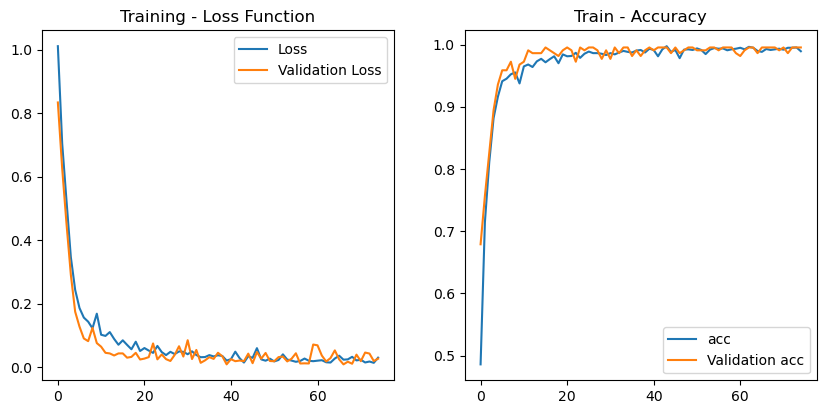

In [44]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(hasil_model.history['loss'], label='Loss')
plt.plot(hasil_model.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(hasil_model.history['acc'], label='acc')
plt.plot(hasil_model.history['val_acc'], label='Validation acc')
plt.legend()
plt.title('Train - Accuracy')
plt.show()

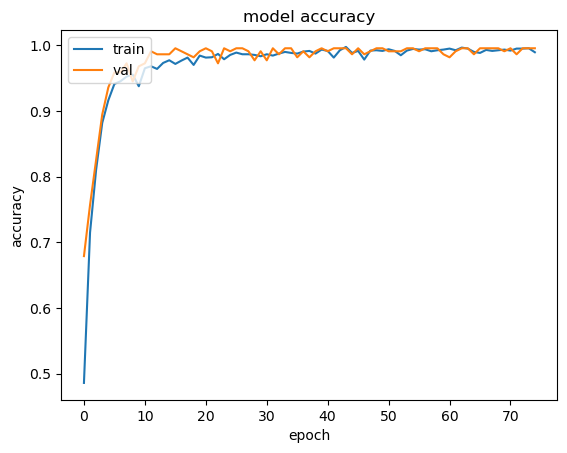

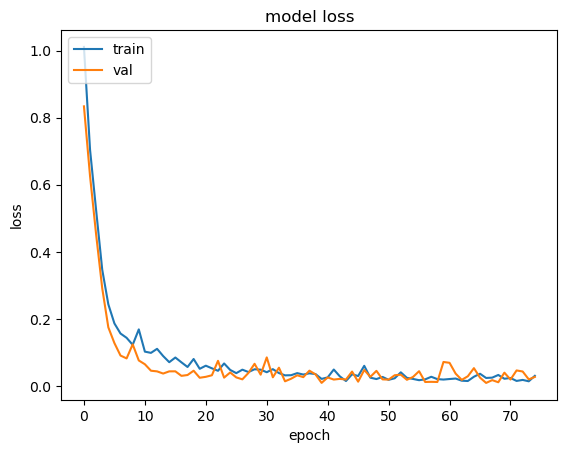

In [49]:
plt.plot(hasil_model.history['acc'])
plt.plot(hasil_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(hasil_model.history['loss'])
plt.plot(hasil_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## KESIMPULAN DEEP LEARNING MODEL
### Kesimpulan dari performa modelnya Adalah Performanya baik
   Deep Learning Berhasil Membedakan Pola Pada Gambar Batu, Gunting dan Kertas dengan Implementasi Pemodelan CNN With TensorFlow dan Evaluasi Model dengan Metrics Akurasi dengan nilai akurasi dan validasi sekitar 99 % . Sehingga Model memiliki Akurasi Performa Model yang sangat baik sesuai yang diharapkan dalam Klasifikasi Gambar pada dataset rock-paper-scissors.

###### 